In [73]:
# !pip install wordninja autocorrect

In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string
from nltk.corpus import stopwords
import pprint
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
# from autocorrect import Speller

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hinglish-and-english-stopwords/stop_hinglish.txt
/kaggle/input/cyberguard-ai-hackathon/train.csv
/kaggle/input/cyberguard-ai-hackathon/test.csv


In [75]:
train = pd.read_csv('/kaggle/input/cyberguard-ai-hackathon/train.csv')
test = pd.read_csv('/kaggle/input/cyberguard-ai-hackathon/test.csv')

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31229 entries, 0 to 31228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            31229 non-null  object
 1   sub_category        28993 non-null  object
 2   crimeaditionalinfo  31222 non-null  object
dtypes: object(3)
memory usage: 732.1+ KB


In [78]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

In [79]:
train.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with Only Girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible Thank you
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging me and Asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through WhatsApp\r\n\r\nI am unaware how he has recieved my contacts list from my phone\r\n\r\nPlease help
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for money by adding sections in the text messages \r\nI request you to take an immediate action on him Frequently he is harassing with these messages For reference please find attached files
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when I have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she will send new phone of vivo and I received that parcel through post on th February to Kurnool head post office where I have not received any mobile


In [80]:
print(train['category'].value_counts())
print(len(train['category'].unique()))
print(train['sub_category'].value_counts())
print(len(train['sub_category'].unique()))

category
Online Financial Fraud                                  57434
Online and Social Media Related Crime                   12140
Any Other Cyber Crime                                   10878
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64
15
sub_category
UPI Related Frauds 

In [81]:
print(test['category'].value_counts())
print(len(test['category'].unique()))
print(test['sub_category'].value_counts())
print(len(test['sub_category'].unique()))

category
Online Financial Fraud                                  18896
Online and Social Media Related Crime                    4139
Any Other Cyber Crime                                    3670
Cyber Attack/ Dependent Crimes                           1261
RapeGang Rape RGRSexually Abusive Content                 912
Sexually Obscene material                                 666
Hacking  Damage to computercomputer system etc            592
Sexually Explicit Act                                     535
Cryptocurrency Crime                                      166
Online Gambling  Betting                                  134
Child Pornography CPChild Sexual Abuse Material CSAM      123
Online Cyber Trafficking                                   61
Cyber Terrorism                                            52
Ransomware                                                 18
Crime Against Women & Children                              4
Name: count, dtype: int64
15
sub_category
UPI Related Frauds 

In [82]:
train[train['sub_category'] == 'Other'].head()

,category,sub_category,crimeaditionalinfo
9,Any Other Cyber Crime,Other,Details entered in pdf file Person posing as Army officer msg us that he want our place on rent and for that to confirm the account he wants us to transfer Re in his account and once confirmed he will transfer back
11,Any Other Cyber Crime,Other,Someone changed my email id nd contact number by using anydesk app nd now he had ordered k product from my account through emi my contact number is nd he changed to this number nd email id also hve been changed now he have access to my account
57,Any Other Cyber Crime,Other,Received sms and then I had call the number they told me to download from play store kyc anydesk app I had downloaded then they told to do next and number arrived on the screen they had asked that no I told them digit no but then I realised that it is a fraud call I had cut the call and informed Vodafone customer care and also informed on police number they told me file a complaint
80,Any Other Cyber Crime,Other,I received call claming to be the SBI Branch manager Kuhas Thrissur branch for getting the PAN card details The caller knows my account number mail ID etc They have even send a mail asking for PAN card and had send message in whatsapp as well \r\nI suspected the call and contacted the SBI customer care and they assured me that no manager will contact the customer for any personal details Attached the mail call log and whatsapp message \r\nReceived call from number \r\nReceived mail from sbisbicoin\r\nWhatsapp from number
87,Any Other Cyber Crime,Other,I ordered dress on th January online shopping wwwdressupharcom so its used and torn product delivered today th January we have contacted customer care number Raju Kumar he said that due to technical issue \r\nunable to refund


In [83]:
train = train.replace("\n", " ", regex=True)
train = train.replace("\r", " ", regex=True)
train['crimeaditionalinfo'] = train['crimeaditionalinfo'].str.lower()
test = test.replace("\n", " ", regex=True)
test = test.replace("\r", " ", regex=True)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].str.lower()

In [84]:
train.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,i had continue received random calls and abusive messages in my whatsapp someone added my number in a unknown facebook group name with only girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible thank you
1,Online Financial Fraud,Fraud CallVishing,the above fraudster is continuously messaging me and asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through whatsapp i am unaware how he has recieved my contacts list from my phone please help
2,Online Gambling Betting,Online Gambling Betting,he is acting like a police and demanding for money by adding sections in the text messages i request you to take an immediate action on him frequently he is harassing with these messages for reference please find attached files
3,Online and Social Media Related Crime,Online Job Fraud,in apna job i have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when i have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss
4,Online Financial Fraud,Fraud CallVishing,i received a call from lady stating that she will send new phone of vivo and i received that parcel through post on th february to kurnool head post office where i have not received any mobile


In [85]:
train[train['crimeaditionalinfo'].str.find('\r') != -1].head(3)

,category,sub_category,crimeaditionalinfo
704,Online Financial Fraud,UPI Related Frauds,NaN
803,Any Other Cyber Crime,Other,NaN
4105,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,NaN


In [86]:
test[test['crimeaditionalinfo'].str.find('\n') != -1].head(3)

,category,sub_category,crimeaditionalinfo
4077,Online Financial Fraud,UPI Related Frauds,NaN
5550,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,NaN
23273,Online Financial Fraud,Fraud CallVishing,NaN


In [87]:
train = train[train['crimeaditionalinfo'].str.find('NaN') == -1]
test = test[test['crimeaditionalinfo'].str.find('NaN') == -1]

In [88]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

train["crimeaditionalinfo"] = train["crimeaditionalinfo"].apply(lambda text: remove_punctuation(text))
test["crimeaditionalinfo"] = test["crimeaditionalinfo"].apply(lambda text: remove_punctuation(text))

In [89]:
stopword_file_path = '/kaggle/input/hinglish-and-english-stopwords/stop_hinglish.txt'
with open(stopword_file_path, 'r', encoding='utf-8') as f:
    stop_hinglish = set(f.read().splitlines())

def remove_hinglish_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_hinglish]

train["crimeaditionalinfo"] = train["crimeaditionalinfo"].apply(lambda text: ' '.join(remove_hinglish_stopwords(text.split())))
test["crimeaditionalinfo"] = test["crimeaditionalinfo"].apply(lambda text: ' '.join(remove_hinglish_stopwords(text.split())))

In [90]:
def split_concatenated_words(text):
    return ' '.join(wordninja.split(text))

# train["crimeaditionalinfo"] = train["crimeaditionalinfo"].apply(lambda text: split_concatenated_words(text))
# test["crimeaditionalinfo"] = test["crimeaditionalinfo"].apply(lambda text: split_concatenated_words(text))

In [91]:
train = train[train['crimeaditionalinfo'].str.len() > 30]

In [92]:
train['crimeaditionalinfo'] = train['crimeaditionalinfo'].replace(r'\s+', ' ', regex=True)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].replace(r'\s+', ' ', regex=True)

In [93]:
train[train['crimeaditionalinfo'].apply(lambda x: bool(re.search(r'\d+', x)))]

,category,sub_category,crimeaditionalinfo


In [94]:
train[(train['sub_category'] == "Other") & (train['category'] != "Any Other Cyber Crime")]

,category,sub_category,crimeaditionalinfo


In [95]:
train[(train['sub_category'].isna()) & (train['category'] != "Any Other Cyber Crime")].head(3)

,category,sub_category,crimeaditionalinfo
8,RapeGang Rape RGRSexually Abusive Content,NaN,message whatsapp number message contains abusive words message includes friend number message forwarded friends details file attached action asap
25,RapeGang Rape RGRSexually Abusive Content,NaN,respected sir matter inform person running involve shamefull activities women places kolkata gariahat ballygunge ruby hospital area kasba anandapur quest mall metropolis mall area acropolismall area park circus forum mall elgin rd parkstreet maidan area esplanade garia jadavpur behalasakherbazar joka bansdroni rabindrasadanexide area haridevpur triangular park lake mall area rashbehari area tollygunge thakurpukur bbd bag dalhousie area saltlake subhro saha amlan datta izaz ahmed anirban officially work insurance office hdfclife hindustanpark gariahat shopping mall st floor reliance trend building gariahat places involve shamefull activities years sir person subhro saha forcefully involve women employee female employee shamefull afternoon evening evening night time shamefull activities innocent trapped suffering dirty issue long time lodge complain threatening blackmailing issue address places mobile whatsapp easily trace track activities investigate years detail
39,Sexually Explicit Act,NaN,httpswwwxnxxtvvideousapbfuckkkarrr link correct video url relative marry person aware information recording malwere functionality recorded permission remove video


In [96]:
len(train[train['crimeaditionalinfo'].str.contains('gpay|paytm')])

5236

In [97]:
def replace_words(text):
    text = re.sub(r'\bgpay\b|\bpaytm\b|\bphonepe\b|\bbhim\b|\bamazon pay\b|\bmobikwik\b|\bfreecharge\b|\bairtel thanks\b|\bjio pay\b', 'UPIAPP', text, flags=re.IGNORECASE)
    text = re.sub(r'\b\w*(gmail|hotmail|yahoo|outlook|aol)\w*\b', 'EMAIL', text)
    text = re.sub(r'\b\w*(https?|www|com)\w*\b', 'WEBSITE', text)
    return text

train['crimeaditionalinfo'] = train['crimeaditionalinfo'].apply(replace_words)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].apply(replace_words)

In [98]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My Ass Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The Fuck
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait
7K=Sick:-D Laugher
"""
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text).lower()

In [99]:
hinglish_incomplete_to_proper = {
    'h': 'hai',
    'k': 'ke',
    'm': 'main',
    'nhi': 'nahin',
    'bcoz': 'because',
    'plz': 'please',
    'frnd': 'friend',
    'msg': 'message',
    'r': 'are',
    'u': 'you',
    'bt': 'but',
    'cnt': 'cannot',
    'd': 'the',
    'ppl': 'people',
    'b': 'be',
    'thx': 'thanks',
    'tmrw': 'tomorrow',
    'bday': 'birthday',
    'gud': 'good',
    'cn': 'can',
    'wd': 'would',
    'abt': 'about',
    'tym': 'time',
    'fwd': 'forward',
    'tks': 'thanks',
    'gf': 'girlfriend',
    'bf': 'boyfriend',
    'bro': 'brother',
    'sis': 'sister',
    'thnx': 'thanks',
    'gn': 'good night',
    'gm': 'good morning',
    'asap': 'as soon as possible',
    'lol': 'laughing out loud',
    'ttyl': 'talk to you later',
    'btw': 'by the way',
    'wru': 'where are you',
    'bcz': 'because',
    'gudnyt': 'good night',
    'wrk': 'work',
    'btr': 'better',
    'smthng': 'something',
    'yr': 'your',
    'tc': 'take care',
    'srsly': 'seriously',
    '1ce': 'once',
    'coz': 'because',
    'thanx': 'thanks',
    'gng': 'going',
    'sm': 'some',
    'wat': 'what',
    'luv': 'love',
    'cud': 'could',
    'tht': 'that',
    'tmrrw': 'tomorrow',
    'ltr': 'later',
    'knw': 'know',
    'cnf': 'confirm',
    'bk': 'back',
    'wud': 'would',
    'tlk': 'talk',
    'cya': 'see you',
    'pls': 'please',
    'brb': 'be right back',
    'idk': 'I dont know',
    'ikr': 'I know right',
    'hbd': 'happy birthday',
    'omw': 'on my way',
    'bff': 'best friend forever',
    'ttys': 'talk to you soon',
    'atm': 'at the moment',
    'nvm': 'never mind',
    'jk': 'just kidding',
    'sup': 'whats up',
    'fyi': 'for your information',
    'smh': 'shaking my head',
    'lmao': 'laughing my ass off',
    'rofl': 'rolling on the floor laughing',
    'imo': 'in my opinion',
    'fam': 'family',
    'bc': 'because',
    'hmu': 'hit me up',
    'bfn': 'bye for now',
    'afk': 'away from keyboard',
    'otw': 'on the way',
    'idc': 'I dont care',
    'ily': 'I love you',
    'b4': 'before',
    'ez': 'easy',
    'rsvp': 'please respond',
    'g2g': 'got to go',
    'lmk': 'let me know',
    'omg': 'oh my god',
    'sol': 'shit out of luck',
    'gr8': 'great',
    'bbl': 'be back later',
    'idts': 'I dont think so',
    'xoxo': 'hugs and kisses',
    'ily2': 'I love you too'
}
def replace_shorthand(text):
    if isinstance(text, str):
        words = text.split()
        corrected_words = [hinglish_incomplete_to_proper.get(word, word) for word in words]
        return ' '.join(corrected_words)
    return text

# Apply the function to the 'crimeaditionalinfo' column
train['crimeaditionalinfo'] = train['crimeaditionalinfo'].apply(replace_shorthand)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].apply(replace_shorthand)

In [100]:
place_names = [
    'gariahat', 'axis mall', 'shivpur', 'baliganj', 'ghatkopar', 'sikandra', 'digha', 'ashiyana', 
    'kishanganj', 'kukatpally', 'sion', 'thrissur', 'darjling', 'dharma', 'chainpur', 'kaimur', 
    'dabri', 'mansarovr', 'balasore', 'raghunathpur', 'unnao', 'thrissur', 'ramnagariya', 'howrah',
    'kamothe', 'balapur', 'hitech', 'gachibowli', 'pallavaram', 'salem', 'jalandhar', 'bhiwandi',
    'jabalpur', 'mira road', 'belgaum', 'bhubaneswar', 'ludhiana', 'rohtak', 'tirupati', 'patna',
    'bhuj', 'solapur', 'madurai', 'gurgaon', 'noida', 'varanasi', 'nagpur', 'amritsar', 'jammu',
    'vijayawada', 'pondicherry', 'vasai', 'thane', 'kochi', 'vizag', 'mangaluru', 'kannur', 'asansol',
    'kanpur', 'dindigul', 'chhindwara', 'davangere', 'hubli', 'bidar', 'tiruvannamalai', 'kalyan',
    'kharghar', 'borivali', 'andheri', 'bandra', 'nariman', 'malad', 'pune', 'borivli', 'vadodara',
    'bhandup', 'mulund', 'khar', 'kurla', 'chembur', 'dadar', 'navi mumbai', 'vikhroli', 'chennai',
    'bhandara', 'nasik', 'indore', 'santacruz', 'bhopal', 'solan', 'ambala', 'satna', 'jhansi', 'udaipur',
    'silchar', 'bokaro', 'trichy', 'jharsuguda', 'paradeep', 'kannauj', 'jalgaon', 'hosur', 'panvel',
    'palghar', 'nanded', 'aligarh', 'surat', 'jalandhar', 'nagda', 'bokaro', 'kozhikode', 'palakkad',
    'erode', 'ratlam', 'nalasopara', 'latur', 'kurnool', 'tuticorin', 'shimla', 'udaipur', 'sikar', 
    'ganganagar', 'bikaner', 'sirsa', 'hisar', 'muzaffarnagar', 'bhilai', 'mathura', 'rampur', 'moradabad', 
    'raebareli', 'sambalpur', 'muzaffarpur', 'gonda', 'palace', 'mall', 'market', 'plaza'
]

# Convert the list to lowercase to match regardless of case
place_names = [place.lower() for place in place_names]

# Function to replace any occurrence of place names with the tag "LOCATION"
def replace_place_names_with_location(text):
    if isinstance(text, str):
        words = text.split()
        corrected_words = ['LOCATION' if word.lower() in place_names else word for word in words]
        return ' '.join(corrected_words)
    return text

# Apply the function to the 'crimeaditionalinfo' column
train['crimeaditionalinfo'] = train['crimeaditionalinfo'].apply(replace_place_names_with_location)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].apply(replace_place_names_with_location)

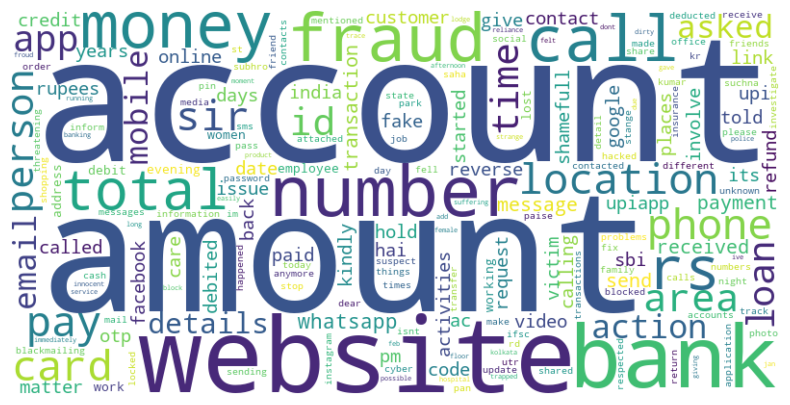

In [101]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

all_text = ' '.join(train['crimeaditionalinfo'].dropna())
all_text = re.sub(r'[^\w\s]', '', all_text)
word_counts = Counter(all_text.lower().split())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85508 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            85508 non-null  object
 1   sub_category        79029 non-null  object
 2   crimeaditionalinfo  85508 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


In [103]:
# Group by 'category' and aggregate unique subcategories into lists
train_category_mapping = train.groupby('category')['sub_category'].apply(lambda x: list(set(x))).to_dict()
pprint.pprint(train_category_mapping, width=80)
print("Number of mappings: ", len(train_category_mapping))

{'Any Other Cyber Crime': ['Other'],
 'Child Pornography CPChild Sexual Abuse Material CSAM': [nan],
 'Cryptocurrency Crime': ['Cryptocurrency Fraud'],
 'Cyber Attack/ Dependent Crimes': ['Tampering with computer source documents',
                                    'Data Breach/Theft',
                                    'Hacking/Defacement',
                                    'SQL Injection',
                                    'Denial of Service (DoS)/Distributed '
                                    'Denial of Service (DDOS) attacks',
                                    'Ransomware Attack',
                                    'Malware Attack'],
 'Cyber Terrorism': ['Cyber Terrorism'],
 'Hacking  Damage to computercomputer system etc': ['Website DefacementHacking',
                                                    'Tampering with computer '
                                                    'source documents',
                                                    'Damage to compu

In [104]:
test_category_mapping = test.groupby('category')['sub_category'].apply(lambda x: list(set(x))).to_dict()
pprint.pprint(test_category_mapping, width=80)
print("\nNumber of mappings: ", len(test_category_mapping))

{'Any Other Cyber Crime': ['Other'],
 'Child Pornography CPChild Sexual Abuse Material CSAM': [nan],
 'Crime Against Women & Children': ['Cyber Blackmailing & Threatening',
                                    'Sexual Harassment',
                                    'Computer Generated CSAM/CSEM'],
 'Cryptocurrency Crime': ['Cryptocurrency Fraud'],
 'Cyber Attack/ Dependent Crimes': ['Tampering with computer source documents',
                                    'Data Breach/Theft',
                                    'Hacking/Defacement',
                                    'SQL Injection',
                                    'Denial of Service (DoS)/Distributed '
                                    'Denial of Service (DDOS) attacks',
                                    'Ransomware Attack',
                                    'Malware Attack'],
 'Cyber Terrorism': ['Cyber Terrorism'],
 'Hacking  Damage to computercomputer system etc': ['Website DefacementHacking',
                     

In [105]:
unique_category_mapping_sets = {category: set(subcategories) for category, subcategories in train_category_mapping.items()}

identical_categories = {}
for category1, subcategories1 in unique_category_mapping_sets.items():
    for category2, subcategories2 in unique_category_mapping_sets.items():
        if category1 != category2 and subcategories1 == subcategories2:
            identical_categories.setdefault(frozenset([category1, category2]), subcategories1)

identical_categories

{frozenset({'Child Pornography CPChild Sexual Abuse Material CSAM',
            'RapeGang Rape RGRSexually Abusive Content'}): {nan},
 frozenset({'Child Pornography CPChild Sexual Abuse Material CSAM',
            'Sexually Explicit Act'}): {nan},
 frozenset({'Child Pornography CPChild Sexual Abuse Material CSAM',
            'Sexually Obscene material'}): {nan},
 frozenset({'RapeGang Rape RGRSexually Abusive Content',
            'Sexually Explicit Act'}): {nan},
 frozenset({'RapeGang Rape RGRSexually Abusive Content',
            'Sexually Obscene material'}): {nan},
 frozenset({'Sexually Explicit Act', 'Sexually Obscene material'}): {nan}}

In [106]:
train[(train['category'] == 'Sexually Obscene material') & (train['sub_category'].isna() == True)].head(3)

,category,sub_category,crimeaditionalinfo
45,Sexually Obscene material,NaN,fake accounts created im suffering year vulgar language chatting instagram friends family members suffering issue kindly requesting humble request
94,Sexually Obscene material,NaN,twitter illegally publishing transmitting sexual photocopy girls twitter big group transmitting girls photo affected group stop social media
122,Sexually Obscene material,NaN,post nude instagram asked told share picture post asked told sind remember


In [107]:
sexual_abuse_categories = [
    'Sexually Obscene material', 
    'Sexually Explicit Act', 
    'RapeGang Rape RGRSexually Abusive Content', 
    'Child Pornography CPChild Sexual Abuse Material CSAM'
]

combined_subcategory = ", ".join(sexual_abuse_categories)
train['sub_category'] = train.apply(lambda row: row['category'] if row['category'] in sexual_abuse_categories else row['sub_category'], axis=1)
train['category'] = train['category'].apply(lambda x: "Sex Abuse" if x in sexual_abuse_categories else x)
test['sub_category'] = test.apply(lambda row: row['category'] if row['category'] in sexual_abuse_categories else row['sub_category'], axis=1)
test['category'] = test['category'].apply(lambda x: "Sex Abuse" if x in sexual_abuse_categories else x)

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85508 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            85508 non-null  object
 1   sub_category        85508 non-null  object
 2   crimeaditionalinfo  85508 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


In [109]:
train[(train['category'] == 'Sex Abuse')].head(3)

,category,sub_category,crimeaditionalinfo
8,Sex Abuse,RapeGang Rape RGRSexually Abusive Content,message whatsapp number message contains abusive words message includes friend number message forwarded friends details file attached action as soon as possible
25,Sex Abuse,RapeGang Rape RGRSexually Abusive Content,respected sir matter inform person running involve shamefull activities women places kolkata LOCATION ballygunge ruby hospital area kasba anandapur quest LOCATION metropolis LOCATION area acropolismall area park circus forum LOCATION elgin rd parkstreet maidan area esplanade garia jadavpur behalasakherbazar joka bansdroni rabindrasadanexide area haridevpur triangular park lake LOCATION area rashbehari area tollygunge thakurpukur bbd bag dalhousie area saltlake subhro saha amlan datta izaz ahmed anirban officially work insurance office hdfclife hindustanpark LOCATION shopping LOCATION st floor reliance trend building LOCATION places involve shamefull activities years sir person subhro saha forcefully involve women employee female employee shamefull afternoon evening evening night time shamefull activities innocent trapped suffering dirty issue long time lodge WEBSITE threatening blackmailing issue address places mobile whatsapp easily trace track activities investigate years detail
39,Sex Abuse,Sexually Explicit Act,WEBSITE link correct video url relative marry person aware information recording malwere functionality recorded permission remove video


In [110]:
len(train[train['crimeaditionalinfo'].str.contains('LOCATION')])

5588

In [111]:
train[train['crimeaditionalinfo'].str.count("LOCATION") > 1].head(3)

,category,sub_category,crimeaditionalinfo
22,Online Gambling Betting,Online Gambling Betting,respected cyber crime LOCATION east mumbai irshad gafur shaikh reside LOCATION east family responsible citizen india family highlight fruadulant loan app quitely robbing innocent family responsible koko loan filling personal details showed clicked check tenurity roi directly selected applied credited account rs repayment amount showing days tenurity screen shots shared reference ag loan loan app limit days tenurity applied credited rs bank account showing repayment days tenurity screen shots recording shared reference mentioned contact center points contact scam heartly request middle class family responaiblity ready credited amount acknowledging
25,Sex Abuse,RapeGang Rape RGRSexually Abusive Content,respected sir matter inform person running involve shamefull activities women places kolkata LOCATION ballygunge ruby hospital area kasba anandapur quest LOCATION metropolis LOCATION area acropolismall area park circus forum LOCATION elgin rd parkstreet maidan area esplanade garia jadavpur behalasakherbazar joka bansdroni rabindrasadanexide area haridevpur triangular park lake LOCATION area rashbehari area tollygunge thakurpukur bbd bag dalhousie area saltlake subhro saha amlan datta izaz ahmed anirban officially work insurance office hdfclife hindustanpark LOCATION shopping LOCATION st floor reliance trend building LOCATION places involve shamefull activities years sir person subhro saha forcefully involve women employee female employee shamefull afternoon evening evening night time shamefull activities innocent trapped suffering dirty issue long time lodge WEBSITE threatening blackmailing issue address places mobile whatsapp easily trace track activities investigate years detail
40,Online Gambling Betting,Online Gambling Betting,avaneesh parasar staying LOCATION flat ranjan LOCATION magistrate colony LOCATION LOCATION road post aashiyana nagar thana rajiv nagar dis LOCATION pin code crores rupees thousands india trading bitcoin promised return profit capital amount returning arguing slangs money figiting everytime giving reason figting retrning money tired catch earliest WEBSITE due scared losing money avaneesh frankly WEBSITE police move legal action police confident police struggling lot returning amount atleast request spread awareness media save partner sanjana anjalli calling inviting join online fraud business taking money returning theier capital fight money removed fb group whomever money returning created group facebook trap money catch as soon as possible


In [112]:
def consolidate_location_tags(text):
    if isinstance(text, str):
        # This regex finds the first "LOCATION" and the last "LOCATION" and removes everything in between
        text = re.sub(r'LOCATION.*LOCATION', 'LOCATION', text)
    return text

train['crimeaditionalinfo'] = train['crimeaditionalinfo'].apply(consolidate_location_tags)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].apply(consolidate_location_tags)

In [113]:
for column in train['sub_category'].unique():
    if column not in test['sub_category'].unique():
        print(column)

Against Interest of sovereignty or integrity of India


In [114]:
for column in test['sub_category'].unique():
    if column not in train['sub_category'].unique():
        print(column)

Computer Generated CSAM/CSEM
Cyber Blackmailing & Threatening
Sexual Harassment


In [115]:
for column in train['category'].unique():
    if column not in test['category'].unique():
        print(column)

Report Unlawful Content


In [116]:
for column in test['category'].unique():
    if column not in train['category'].unique():
        print(column)

Crime Against Women & Children


In [117]:
train = train[train['category'] != "Against Interest of sovereignty or integrity of India"]

In [118]:
def preprocess_text(text):
    # Add spaces around punctuation
    text = re.sub(r"([.,!?;:])", r" \1 ", text)
    # Remove any extra whitespace
    text = re.sub(r"\s{2,}", " ", text)
    return text.strip()

# Apply preprocessing
# train["crimeaditionalinfo"] = train["crimeaditionalinfo"].apply(preprocess_text)
# test["crimeaditionalinfo"] = test["crimeaditionalinfo"].apply(preprocess_text)

In [119]:
test[test['category'] == "Crime Against Women & Children"]

,category,sub_category,crimeaditionalinfo
2762,Crime Against Women & Children,Computer Generated CSAM/CSEM,friend mentioned happened months ago oneoff suddenly weird notification update password message didn’t usual receive app looked bit back paid attention details late accounts WEBSITE fix problems bank account notifiction locked left anxious frustrated can’t sleep knowing information i’ve considered deleting accounts that’s solution tablet isn’t working anymore it’s stange fell email
9517,Crime Against Women & Children,Computer Generated CSAM/CSEM,issue started email glance spam ignore things reason opened time afterward phone started freezing wasn’t normal technical glitch i’m honestly it’s mess don’t start i’ve contacted support giving runaround fix problems email notifiction locked worst part don’t trust anymore friends family everyone’s acting strange it’s affecting relationships mental health tablet isn’t working anymore it’s stange fell email
14779,Crime Against Women & Children,Cyber Blackmailing & Threatening,friend mentioned happened months ago oneoff suddenly weird notification update password message didn’t usual receive app looked bit back paid attention details late accounts WEBSITE fix problems social media hackd locked left anxious frustrated can’t sleep knowing information i’ve considered deleting accounts that’s solution tablet isn’t working anymore it’s stange fell email
19725,Crime Against Women & Children,Sexual Harassment,imagined happen especially im cautious started noticing online activity felt different slower describe normal fact constantly logged accounts it’s hard explain felt inside account things wasn’t online fix problems social media recived locked don’t i’ve felt violated privacy WEBSITE shattered can’t make stop laptop isn’t working anymore it’s stange fell email


In [120]:
rows_to_replace = [2762, 9517, 14779, 19725]

test.loc[rows_to_replace, 'category'] = 'Hacking Damage to computer system etc'
test.loc[rows_to_replace, 'sub_category'] = 'Email Hacking'

In [121]:
train_duplicates_in_test = train['crimeaditionalinfo'].isin(test['crimeaditionalinfo']).sum()
test_duplicates_in_train = test['crimeaditionalinfo'].isin(train['crimeaditionalinfo']).sum()

train_duplicates_in_test, test_duplicates_in_train

(9001, 3600)

In [122]:
# Checking the unique overlaps by removing duplicates within each dataset
train = train.drop_duplicates(subset='crimeaditionalinfo')
test = test.drop_duplicates(subset='crimeaditionalinfo')

# Counting overlaps by checking each unique set against the other
train_in_test_overlap = train['crimeaditionalinfo'].isin(test['crimeaditionalinfo']).sum()
test_in_train_overlap = test['crimeaditionalinfo'].isin(train['crimeaditionalinfo']).sum()

train_in_test_overlap, test_in_train_overlap

(1194, 1194)

In [123]:
train = train[~train['crimeaditionalinfo'].isin(test['crimeaditionalinfo'])]

In [124]:
def process_text(df, contractions_dict, verbose=True):
    # Step 1: Add spaces before punctuation
    # def space_punctuations(text):
    #     return ''.join([' ' + char if not char.isalnum() and char != ' ' else char for char in text])

    # Step 2: Handle contractions
    def expand_contractions(text, contractions):
        return ' '.join([contractions.get(word, word) for word in text.split()])

    # Step 3: Handle multiple forms (convert plural to singular if singular exists)
    def handle_multiple_forms(text, local_vocab):
        words = text.split()
        return ' '.join([word[:-1] if word.endswith('s') and word[:-1] in local_vocab else word for word in words])

    # Load your vocabulary (this can be dynamic or predefined)
    local_vocab = set(word for text in df['crimeaditionalinfo'] for word in text.split())

    # Apply transformations
    # df['crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(space_punctuations)
    df['crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(lambda x: expand_contractions(x, contractions_dict))
    df['crimeaditionalinfo'] = df['crimeaditionalinfo'].str.replace("'", "", regex=False)
    df['crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(lambda x: handle_multiple_forms(x, local_vocab))

    if verbose:
        print("Processing complete!")
    return df

# Example contractions dictionary
contractions_dict = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mightn't": "might not",
    "might've": "might have",
    "mustn't": "must not",
    "must've": "must have",
    "needn't": "need not",
    "o'clock": "of the clock",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "shouldn't": "should not",
    "that'd": "that would",
    "that's": "that is",
    "there'd": "there would",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who's": "who is",
    "why's": "why is",
    "won't": "will not",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
    "'cause": "because",
    "could've": "could have",
    "should've": "should have",
    "would've": "would have",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "it'd've": "it would have",
    "he'd've": "he would have",
    "she'd've": "she would have",
    "we'd've": "we would have",
    "they'd've": "they would have",
    "you'd've": "you would have",
    "let's": "let us",
    "y'all": "you all",
    "y'alls": "you alls",
    "dunno": "do not know",
    "gimme": "give me",
    "gonna": "going to",
    "gotta": "got to",
    "wanna": "want to",
    "lemme": "let me",
    "outta": "out of",
    "kinda": "kind of",
    "sorta": "sort of"
}

# Example usage
train = process_text(train, contractions_dict)
test = process_text(test, contractions_dict)

Processing complete!
Processing complete!


In [125]:
STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

train['crimeaditionalinfo'] = train['crimeaditionalinfo'].apply(clean_text)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].apply(clean_text)

In [126]:
train['crimeaditionalinfo'] = train['crimeaditionalinfo'].str.replace(f"[{string.punctuation}]", "", regex=True)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].str.replace(f"[{string.punctuation}]", "", regex=True)

In [127]:
# Split text into individual words across all rows and count unique words
unique_words = set(word for text in train['crimeaditionalinfo'] for word in text.split())

# Count the unique words
unique_word_count = len(unique_words)

print(f"Number of unique words: {unique_word_count}")

Number of unique words: 98035


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75133 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            75133 non-null  object
 1   sub_category        75133 non-null  object
 2   crimeaditionalinfo  75133 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


# Model Training

In [129]:
train['tokens'] = train['crimeaditionalinfo'].apply(lambda text: text.split())
test['tokens'] = test['crimeaditionalinfo'].apply(lambda text: text.split())
tokenized_sentences = train['tokens'].tolist()

In [130]:
from gensim.models import Word2Vec
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import re
from nltk.corpus import stopwords

# Check GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("Using GPU for training.")

# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=train['tokens'],
    vector_size=300,       # Embedding size
    window=10,              # Context size
    min_count=5,           # Minimum frequency for a word to be included
    sg=1,                  # Skip-gram model for better semantic capture
    epochs=10              # Training epochs
)
w2v_model.build_vocab(test['tokens'], update=True)
w2v_model.train(test['tokens'], total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)
w2v_model.save("w2v_hinglish_optimized.model")

Num GPUs Available:  1
Using GPU for training.


In [135]:
# Step 3: Prepare Embedding Matrix
tok = Tokenizer()
tok.fit_on_texts(train['crimeaditionalinfo'])  # Fit only on training data
word_index = tok.word_index
vocab_size = len(word_index) + 1

# Convert text to sequences
train_sequences = tok.texts_to_sequences(train['crimeaditionalinfo'])
test_sequences = tok.texts_to_sequences(test['crimeaditionalinfo'])

# Pad sequences to a fixed length
max_text_len = max(train['tokens'].apply(len).max(), test['tokens'].apply(len).max())
train_padded = pad_sequences(train_sequences, maxlen=max_text_len, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_text_len, padding='post')

# Create embedding matrix
embed_dim = 300
embed_matrix = np.zeros((vocab_size, embed_dim))
for word, i in word_index.items():
    if word in w2v_model.wv:
        embed_matrix[i] = w2v_model.wv[word]

# Step 4: Encode Labels
label_encoder = LabelEncoder()
train['sub_category_encoded'] = label_encoder.fit_transform(train['sub_category'])
test['sub_category_encoded'] = label_encoder.transform(test['sub_category'])

y_train = to_categorical(train['sub_category_encoded'])
y_test = to_categorical(test['sub_category_encoded'])

# Step 5: Attention Layer Implementation
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="attention_weight", shape=(input_shape[-1], 1), initializer="random_normal")
        self.b = self.add_weight(name="attention_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

# Step 6: Build BiLSTM Model with Attention
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embed_dim,
                    weights=[embed_matrix],
                    trainable=False))
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # Increased LSTM units
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(train_padded, y_train, 
                    epochs=15, 
                    batch_size=32, 
                    validation_split=0.1, 
                    callbacks=[early_stop])

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_padded, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/15
529/529 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.3300 - loss: 2.3260 - val_accuracy: 0.4590 - val_loss: 1.7524
Epoch 2/15
529/529 ━━━━━━━━━━━━━━━━━━━━ 30s 58ms/step - accuracy: 0.4635 - loss: 1.7347 - val_accuracy: 0.4775 - val_loss: 1.6780
Epoch 3/15
529/529 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.4849 - loss: 1.6523 - val_accuracy: 0.4782 - val_loss: 1.6520
Epoch 4/15
529/529 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.4978 - loss: 1.6079 - val_accuracy: 0.4929 - val_loss: 1.6223
Epoch 5/15
529/529 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.5048 - loss: 1.5776 - val_accuracy: 0.4907 - val_loss: 1.6145
Epoch 6/15
529/529 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.5131 - loss: 1.5514 - val_accuracy: 0.4933 - val_loss: 1.6078
Epoch 7/15
529/529 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.5240 - loss: 1.5165 - val_accuracy: 0.4932 - val_loss: 1.6079
Epoch 8/15
529/529 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.5295 - loss: 1.4973 - 